In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
uploaded=files.upload()

Saving dataset.csv to dataset.csv


In [2]:
df=pd.read_csv('dataset.csv')
df.shape

(114000, 21)

In [3]:
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [20]:
#TRAIN TEST SPLIT IS FIRST APPLIED ON THE DATASET, TRACK_GENRE IS TAKEN AS THE TARGET y COLUMN
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df.drop('popularity',axis=1), df['popularity'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [21]:
#1.	Converting the explicit column (TRUE/FALSE) into numeric using Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
cat_cols = ['explicit']
oe = OrdinalEncoder(categories=[[False, True]])
X_train[cat_cols] = oe.fit_transform(X_train[cat_cols])
X_test[cat_cols] = oe.transform(X_test[cat_cols])


In [22]:
X_train

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,is_dance_hit
23714,23714,18FsuqmAETaK0MDWqLLK4G,Benjamin Darren;Audiosonic,Love Like This,Love Like This,157994,0.0,0.714,0.755,11,...,0,0.0371,0.319000,0.005410,0.1030,0.560,125.967,4,deep-house,1
110621,110621,3GYH6TqF2fIihKps1Sedxc,Armin van Buuren;AVIRA,Sirius,Sirius,226976,0.0,0.406,0.991,7,...,1,0.0505,0.004220,0.840000,0.1200,0.219,122.528,4,trance,0
49346,49346,6IfFYmDKQd7NUBGsSBJ3l4,Frequencerz;Ali B;Poke;Judeska,"Anderhalf (feat. Ali B, Poke & Judeska) [Frequ...","Anderhalf (feat. Ali B, Poke & Judeska) - Freq...",167322,1.0,0.596,0.988,9,...,1,0.1300,0.004270,0.000712,0.2270,0.738,155.086,4,hardstyle,0
27183,27183,5uZzaQzp3MQef8d0kfuIAI,Logistics,Now More Than Ever,City Life,271480,0.0,0.441,0.966,4,...,1,0.0469,0.000121,0.817000,0.2690,0.401,174.001,4,drum-and-bass,0
67567,67567,4rR6TjxYfYJfIlj7LkvNqz,Sofía Reyes;Jason Derulo;De La Ghetto,Upbeat 20's,"1, 2, 3",201526,0.0,0.792,0.895,1,...,0,0.0587,0.165000,0.000000,0.0501,0.793,94.968,4,latin,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,21243,3lpmIoqpJmiY074Kay62SW,Yemi Alade,Africa Rising Vol.4,Home,224000,0.0,0.555,0.820,7,...,1,0.0782,0.121000,0.000004,0.1290,0.968,113.000,4,dancehall,0
45891,45891,3V4InT51kenWLTfXC6PfYr,Sonny Chillingworth,"Hawaiian Slack Key Guitar Masters, Vol. 2",Liloa's Mele - Grandson's Lullaby,166573,0.0,0.448,0.150,0,...,1,0.0385,0.772000,0.885000,0.1190,0.125,93.857,4,guitar,0
42613,42613,1eWNzbwzDFyQ7WTWAWZbnK,Nasum,Helvete,Slaves To the Grind,71240,1.0,0.239,0.961,1,...,1,0.1850,0.000004,0.151000,0.3220,0.210,121.329,5,grindcore,0
43567,43567,3NiB3v3elOuAy4Ij51F4Sl,Maur,Deep Inside,Deep Inside,202633,0.0,0.637,0.936,11,...,0,0.0371,0.046500,0.000150,0.1040,0.497,126.027,3,groove,0


In [23]:
df.dtypes

,0
Unnamed: 0,int64
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64


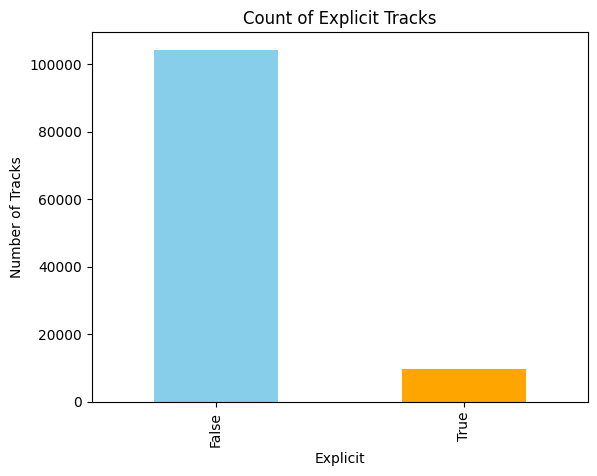

In [24]:
#Visualizing using appropriate graph.
value_counts = df['explicit'].value_counts()
value_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Count of Explicit Tracks')
plt.xlabel('Explicit')
plt.ylabel('Number of Tracks')
plt.show()

In [25]:
#2.	Creating a new column called is_dance_hit which is:1 if danceability > 0.7 and 0 otherwise
df['is_dance_hit'] = (df['danceability'] > 0.7).astype(int)
df.sample(20)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,is_dance_hit
16396,16396,6Xg2YxMweLpbOcv15d8Mh7,Maurice Ravel;Duo Synopsis,"Ravel, Schuloff, Honegger, Schnittke: 20th Cen...","Sonata for Violin and Cello in C Major, M. 73:...",0,343552,False,0.104,0.0491,...,0,0.0460,0.984000,0.510000,0.0990,0.0341,90.278,4,classical,0
34473,34473,5377z0OljWvRR7CdSQrJxP,Hollow Coves,Wanderlust,The Woods,61,241546,False,0.802,0.4100,...,1,0.0455,0.411000,0.001070,0.0941,0.2240,106.050,4,folk,1
96979,96979,3lLIvGJ8R0Xa8fEU8lGUVU,Vou pro Sereno;Thiaguinho,Jogando em Casa (Ao Vivo),Arco-Íris (feat. Thiaguinho) - Ao Vivo,36,196863,False,0.560,0.8380,...,1,0.0560,0.767000,0.000000,0.9700,0.6970,92.045,4,samba,0
80836,80836,6anjTd9oOebDSG3XyZoj5S,Thaman S,Vaalu (Original Motion Picture Soundtrack),U R My Darling,57,279240,False,0.809,0.7680,...,1,0.1320,0.540000,0.012900,0.0573,0.5650,128.037,4,pop-film,1
69715,69715,0gbLQwlja2m4frVyiqtHJR,Ekalavyan,Lokame,Lokame,21,254117,False,0.611,0.5820,...,0,0.2580,0.353000,0.000000,0.1220,0.4280,169.882,4,malay,0
49291,49291,5NsmM63cCjJgX5Akd1AUmE,Eternate;Adronity;TNYA,Harder Tunes Forever - 100% the Best in Hardst...,Invincible,0,204639,False,0.477,0.8070,...,0,0.0458,0.000337,0.000000,0.1550,0.3590,154.941,4,hardstyle,0
55639,55639,3rAtGIxBoLvcWtZeoJ0Q72,Jasleen Royal,Kesari,Deh Shiva (Female Version),47,155999,False,0.378,0.1670,...,1,0.0329,0.989000,0.006170,0.0954,0.3060,176.731,4,indian,0
88452,88452,1BkY0N8ChFk2mdLbAUu8ZK,Musical Youth,Anthology,Pass The Dutchie,78,205426,False,0.805,0.4180,...,1,0.0979,0.459000,0.000000,0.2880,0.9660,149.724,4,reggae,1
98682,98682,2t0RjuuKBxCsqQFQ3Ztfx5,Phillipa Soo,A Caminho da Lua (Trilha sonora do filme Netflix),"Ultraluminary (From the Netflix Film ""Over the...",22,200000,False,0.670,0.7080,...,0,0.0613,0.076400,0.000000,0.0565,0.2460,129.955,3,show-tunes,0
58828,58828,6CmXuuXstpcQeLL007qdti,Tones On Tail,Everything!,Burning Skies,22,387106,False,0.379,0.5050,...,0,0.0325,0.002240,0.618000,0.2030,0.3530,95.090,4,industrial,0


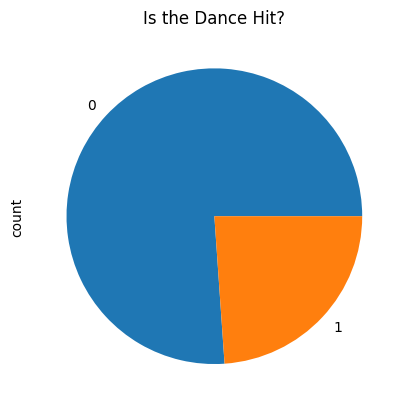

In [26]:
#visualizing the above code
value_count=df['is_dance_hit'].value_counts()
value_count.plot(kind='pie',color=['skyblue', 'orange'])
plt.title('Is the Dance Hit?')
plt.show()

In [27]:
#calculating the average popularity of dance hits vs. non-dance hits.
df.groupby('is_dance_hit')['popularity'].mean()

,popularity
is_dance_hit,
0,33.440245
1,32.596271


In [28]:
#Applying Standardization to loudness column
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[['loudness']])
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled['loudness']=scaler.transform(X_train_scaled[['loudness']])
X_test_scaled['loudness']=scaler.transform(X_test_scaled[['loudness']])

In [30]:
m=df['loudness'].mean()#mean
s=df['loudness'].std()#standard deviation
filt=df['loudness']> (m+2*s)#filtering outliers
df1=df[filt]
df1[['track_genre', 'album_name', 'artists']]
#a more energetic genre type of song has much more louder type of songs than the others in the dataframe. The album of Najand has two such loud songs

,track_genre,album_name,artists
17574,club,Gray Data,Five Star Hotel
37738,funk,TIPO HARIEL - SEI QUE E RARIDADE -,DJ BRUNO PRADO
38840,garage,We Bring Anything to the Table... Except Table...,The Red Pears
59225,iranian,In the Night of Revolution,Najand
59337,iranian,In the Night of Revolution,Najand


In [31]:
#Normalization using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
scale.fit(X_train[['acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence','tempo']])
X_train_scaled[['acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence','tempo']]=scale.transform(X_train_scaled[['acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence','tempo']])
X_test_scaled[['acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence','tempo']]=scale.transform(X_test_scaled[['acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence','tempo']])
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

np.round(X_train.describe(),1)


,Unnamed: 0,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_dance_hit
count,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0
mean,56931.9,228505.7,0.1,0.6,0.6,5.3,-8.2,0.6,0.1,0.3,0.2,0.2,0.5,122.1,3.9,0.2
std,32890.4,108118.9,0.3,0.2,0.3,3.6,5.0,0.5,0.1,0.3,0.3,0.2,0.3,30.0,0.4,0.4
min,0.0,0.0,0.0,0.0,0.0,0.0,-49.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,28413.8,174258.2,0.0,0.5,0.5,2.0,-10.0,0.0,0.0,0.0,0.0,0.1,0.3,99.3,4.0,0.0
50%,56919.0,213200.0,0.0,0.6,0.7,5.0,-7.0,1.0,0.0,0.2,0.0,0.1,0.5,122.0,4.0,0.0
75%,85413.5,261946.0,0.0,0.7,0.9,8.0,-5.0,1.0,0.1,0.6,0.1,0.3,0.7,140.1,4.0,0.0
max,113999.0,4789026.0,1.0,1.0,1.0,11.0,4.5,1.0,1.0,1.0,1.0,1.0,1.0,222.6,5.0,1.0


In [32]:
np.round(X_train_scaled.describe(),1)

,Unnamed: 0,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,is_dance_hit
count,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0,79800.0
mean,56931.9,228505.7,0.1,0.6,0.6,5.3,-8.2,0.6,0.1,0.3,0.2,0.2,0.5,0.5,3.9,0.2
std,32890.4,108118.9,0.3,0.2,0.3,3.6,5.0,0.5,0.1,0.3,0.3,0.2,0.3,0.1,0.4,0.4
min,0.0,0.0,0.0,0.0,0.0,0.0,-49.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,28413.8,174258.2,0.0,0.5,0.5,2.0,-10.0,0.0,0.0,0.0,0.0,0.1,0.3,0.4,4.0,0.0
50%,56919.0,213200.0,0.0,0.6,0.7,5.0,-7.0,1.0,0.1,0.2,0.0,0.1,0.5,0.5,4.0,0.0
75%,85413.5,261946.0,0.0,0.7,0.9,8.0,-5.0,1.0,0.1,0.6,0.1,0.3,0.7,0.6,4.0,0.0
max,113999.0,4789026.0,1.0,1.0,1.0,11.0,4.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0


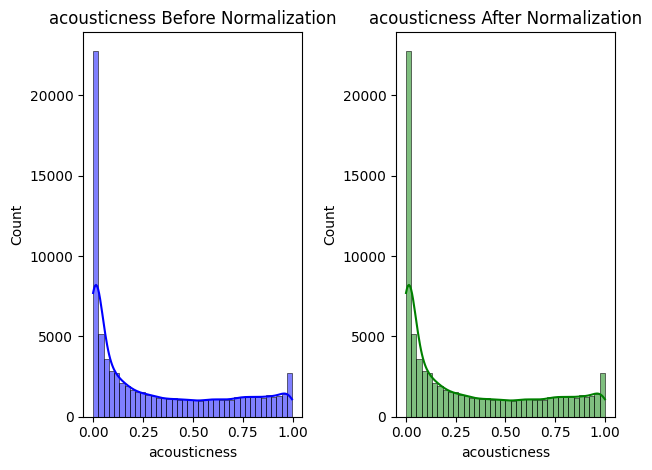

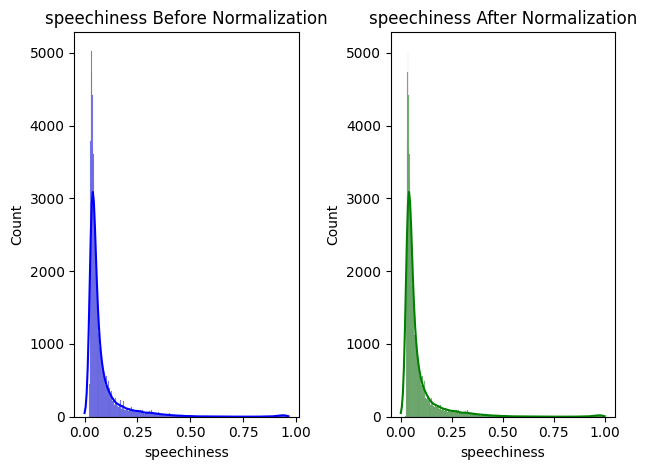

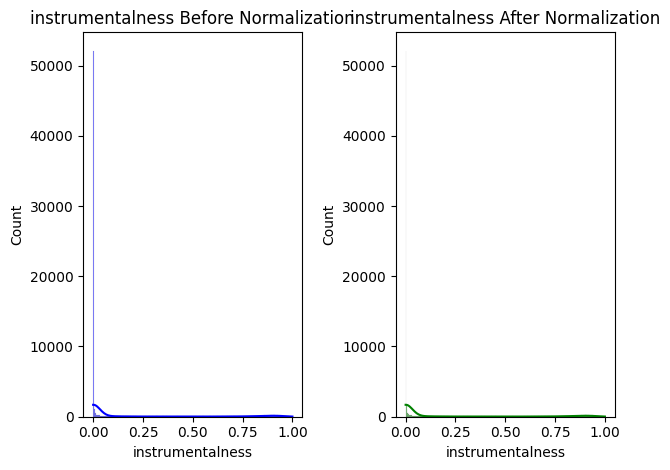

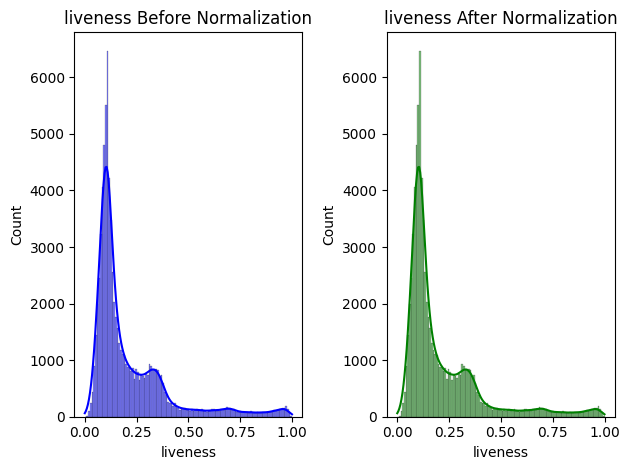

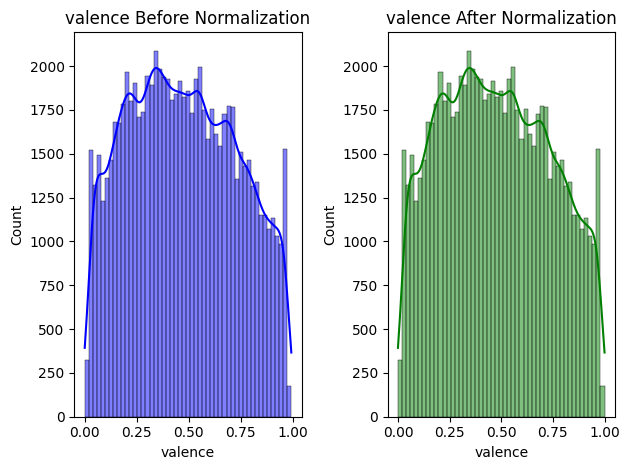

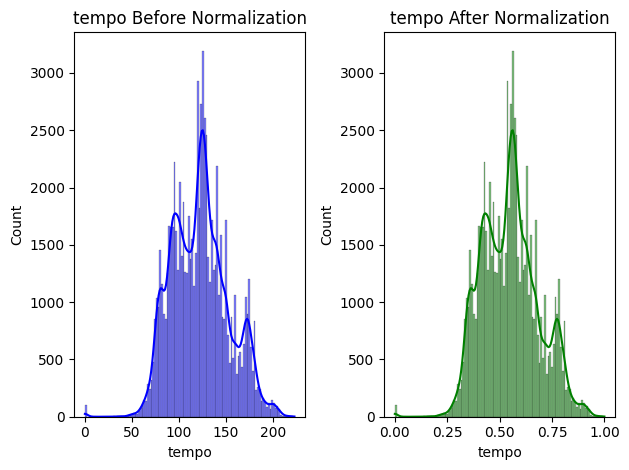

In [33]:
#graphs individuALs before and after normalization
import seaborn as sns
columns = ['acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for col in columns:
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[col], kde=True, color='blue')
    plt.title(f'{col} Before Normalization')
    plt.xlabel(col)
    plt.ylabel('Count')

    # After normalization
    plt.subplot(1, 2, 2)
    sns.histplot(X_train_scaled[col], kde=True, color='green')
    plt.title(f'{col} After Normalization')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

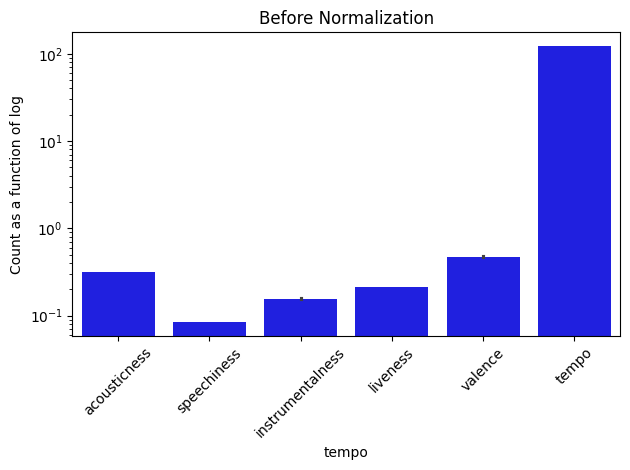

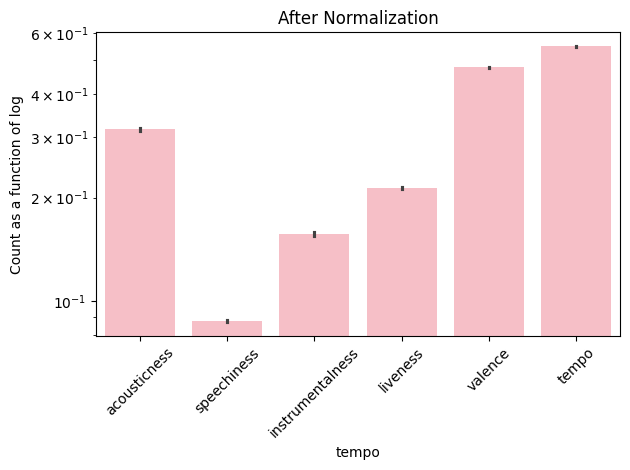

In [50]:
cols = ['acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']
sns.barplot(X_train[cols], color='blue', log=True)
plt.title('Before Normalization')
plt.xlabel(col)
plt.ylabel('Count as a function of log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sns.barplot(X_train_scaled[cols], color='lightpink', log=True)
plt.title('After Normalization')
plt.xlabel(col)
plt.ylabel('Count as a function of log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
from math import remainder
from sklearn.preprocessing import OneHotEncoder
#5.	Use ColumnTransformer (on the original dataset) to:Standardize: duration_ms, loudness, tempo, One-hot encode: track_genre, key,Ordinal encode: explicit
from sklearn.compose import ColumnTransformer
transformer=ColumnTransformer(transformers=[('tnf1', StandardScaler(), ['duration_ms', 'loudness', 'tempo']),
                                           ('tnf2', OneHotEncoder(drop='first', sparse_output=False), ['track_genre', 'key']),
                                           ('tnf3', OrdinalEncoder(), ['explicit'])], remainder='passthrough')


In [38]:
transformer.fit_transform(X_train_original).shape#final shape of training dataset


(79800, 143)

In [40]:
transformer.fit_transform(X_test_original).shape#final shape of test dataset

(34200, 143)